#Exercises 14

**Image**

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

**1-Read all content of the folder (/dataset/images), Regardless of the file type and file name in the folder using python. (use os.scandir() or os.listdir() )**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = r'/content/drive/MyDrive/dataset/images'

fileList=[]

for file in os.listdir(path):
	fileList.append(os.path.join(path,file))

In [ ]:
fileList

['/content/drive/MyDrive/dataset/images/e.jpg',
 '/content/drive/MyDrive/dataset/images/c.jpg',
 '/content/drive/MyDrive/dataset/images/d.png',
 '/content/drive/MyDrive/dataset/images/a.jpg',
 '/content/drive/MyDrive/dataset/images/b.jpg']

**2. Check the type of image ( Color, gray or binary).**

In [ ]:
#Get the number of channels of an image
def num_channel(img):
  if img.ndim==2:
     channels=1
  elif img.ndim==3:
      channels=img.shape[-1]
  else:
       print('image has unexpcted channel')
  return channels      

In [ ]:
#Define a function to distinguish a black and white image from a gray image
def gray_or_binary(img):
    unique_intensities = np.unique(img)
    len_unique_intensities = len(unique_intensities)
    
    if len_unique_intensities > 2:
        type_of_image = 'Gray'
    elif len_unique_intensities == 2:
        sorted_unique_intestines = np.sort(unique_intensities)

        #print(sorted_unique_intestines[0])
        #print(sorted_unique_intestines[1])
        
        if sorted_unique_intestines[0] == 0 and (sorted_unique_intestines[1] == 1 or 255):
            type_of_image = 'Binary'
        else:
            type_of_image = 'Gray'
    elif len_unique_intensities ==1:
        binary_intensities = [0,1,255]
        if unique_intensities[0] in binary_intensities:
            type_of_image = 'Binary'
        else:
            type_of_image = 'Gray'
    
    return type_of_image

In [ ]:
#Function definition to specify the image type
type_of_image='Nothing'

def find_type_of_image(imgpath):
  
  img=cv.imread(imgpath,cv.IMREAD_UNCHANGED)
  number_of_channal=num_channel(img)

  if number_of_channal==4:
    type_of_image='Color image with an alpha channel'

  elif number_of_channal==3:
    type_of_image='Color'
  
  elif number_of_channal==2:
    type_of_image='Gray'

  elif number_of_channal==1:
     type_of_image=gray_or_binary(img)

  return type_of_image  
      

In [ ]:
for i in fileList:
  print('type of image is:{}'.format(find_type_of_image(i)))

type of image is:Gray
type of image is:Gray
type of image is:Gray
type of image is:Gray
type of image is:Color


**3. If the image is in color, convert it to grayscale, and then find the contrast of the image( 255 - pixel intensity)**

In [ ]:
#Contrast function definition
def inverted_img(img):
  inveted_imge=(255-img)
  return inveted_imge

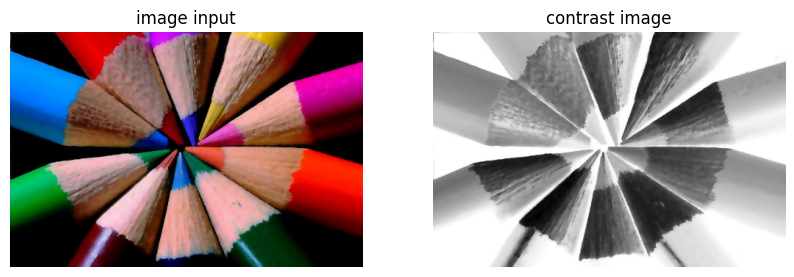

In [ ]:
#Display the original image and its image contrast
for i in fileList:
    if find_type_of_image(i)=='Color':
        img=cv.imread(i)
        img_gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
        plt.figure(figsize=(10,18))
        plt.subplot(121);
        plt.axis('off')
        plt.imshow(img[:,:,::-1]);
        plt.title('image input')

        plt.subplot(122);
        plt.axis('off')
        contrast=inverted_img(img_gray)
        plt.imshow(contrast,cmap='gray')
        plt.title('contrast image')

**4. If the image is in gray, convert it to binary, and then find the contrast of the image(255 - pixel intensity).**

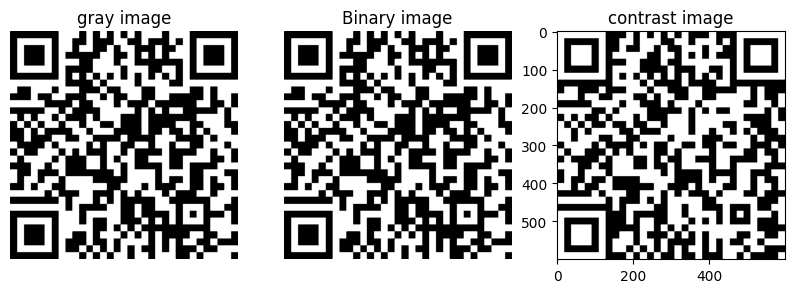

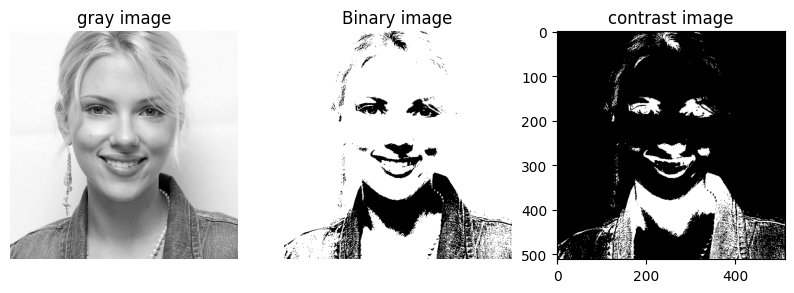

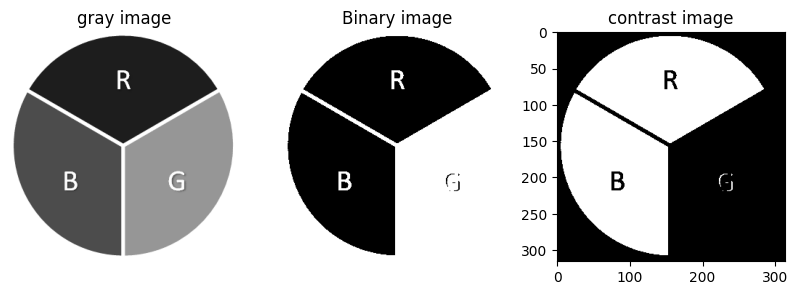

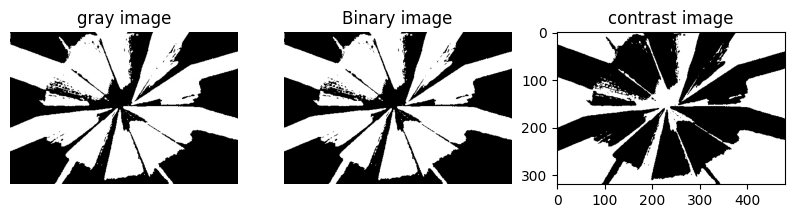

In [ ]:
#Display the main function in gray and convert it to binary and finally display its contrast
for i in fileList:
    if find_type_of_image(i)=='Gray':
        img=cv.imread(i)
        ret,thresh=cv.threshold(img,120,255,cv.THRESH_BINARY)
        plt.figure(figsize=(10,18))
        plt.subplot(131);
        plt.axis('off')
        plt.imshow(img,cmap='gray');
        plt.title('gray image')

        plt.subplot(132);
        plt.axis('off')
        plt.imshow(thresh)
        plt.title('Binary image')
        
        plt.subplot(133);
        pcontrast=inverted_img(thresh)
        plt.imshow(pcontrast,cmap='gray')
        plt.title('contrast image')